In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
from fpfs import pltutil
import numpy as np
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#nver='var1em9' # 'var0em0'#
# read noiseless data
mm1=[]
mm2=[]
for _i in range(8):
    nver='var0em0' # 'var0em0'#
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    nver='var7em3' # 'var0em0'#
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

8100

In [56]:
gc.collect()
clist=np.logspace(-1.8,0.2,12)
shapenoi=np.zeros(len(clist))
totnoise=np.zeros(len(clist))
for it,Const in enumerate(clist):
    noirev =   False
    ellM1  =   fpfs.catutil.fpfsM2E(mm1,const=Const,noirev=noirev)
    noirev =   False
    ellM2  =   fpfs.catutil.fpfsM2E(mm2,const=Const,noirev=noirev)
    shapenoi[it]=np.sqrt(np.average(ellM1['fpfs_e1']**2.))/np.average((ellM1['fpfs_R1E']+ellM1['fpfs_R2E'])/2.)
    totnoise[it]=np.sqrt(np.average(ellM2['fpfs_e1']**2.))/np.average((ellM1['fpfs_R1E']+ellM1['fpfs_R2E'])/2.)
    del ellM1,ellM2

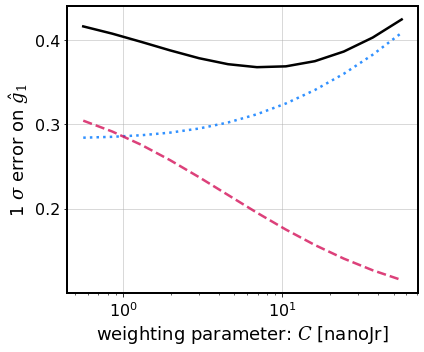

In [57]:
plt.close()
pix_scale=0.168
fig,axes=pltutil.make_figure_axes(nx=1,ny=1)
ax=axes[0]
ax.plot(clist/pix_scale**2,totnoise,color=pltutil.colors[0],ls='-',linewidth=2.5)
ax.plot(clist/pix_scale**2,shapenoi,color=pltutil.colors[1],ls=':',linewidth=2.5)
ax.plot(clist/pix_scale**2,np.sqrt(totnoise**2-shapenoi**2),color=pltutil.colors[2],ls='--',linewidth=2.5)
ax.set_xscale('log')
ax.set_xlabel('weighting parameter: $C$ [nanoJr]')
ax.set_ylabel('1 $\sigma$ error on $\hat{g}_1$')
ax.set_yticks([0.2,0.3,0.4])
ax.grid()
fig.tight_layout()
fig.savefig('optimalC.pdf')

In [50]:
1./(3.6/3.8)

1.0555555555555556

In [58]:
10*pix_scale**2.

0.28224000000000005

In [60]:
pix_scale**2.

0.028224000000000003